(309700, 75)


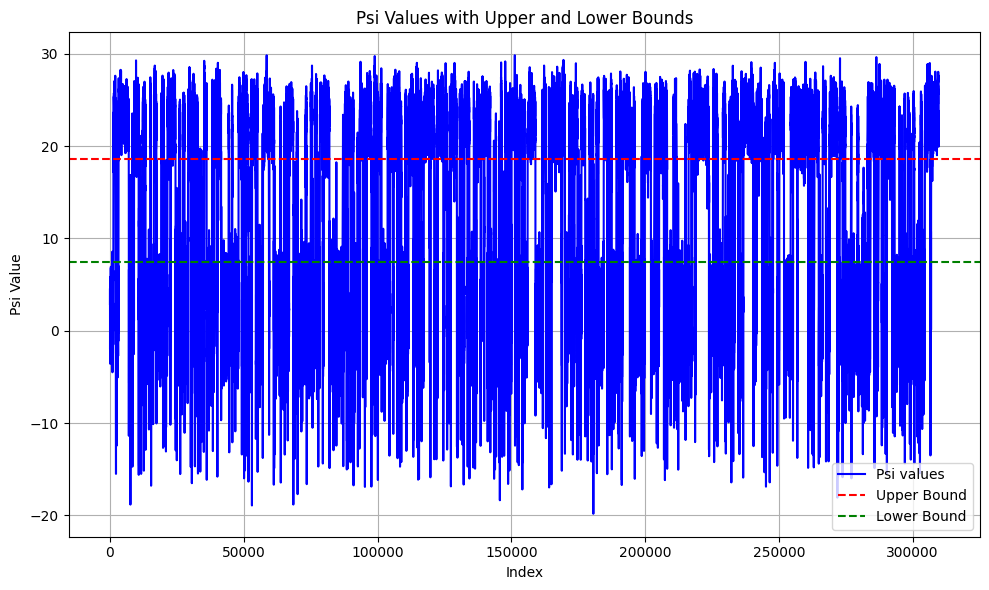

In [261]:
import numpy as np
import matplotlib.pyplot as plt

psi = np.load("/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/data/actual/long_run_310k.npy")
psi = psi[:,1,:]
print(psi.shape)

UPPER_BOUND = 53.8 / 2.8935
LOWER_BOUND = 7.41

psi = psi.reshape(309700, 75)
plt.figure(figsize=(10, 6))
plt.plot(psi[:, 63], label='Psi values', color='blue')
plt.axhline(y=UPPER_BOUND, color='red', linestyle='--', label='Upper Bound')
plt.axhline(y=LOWER_BOUND, color='green', linestyle='--', label='Lower Bound')
plt.title('Psi Values with Upper and Lower Bounds')
plt.xlabel('Index')
plt.ylabel('Psi Value')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [262]:
psi = psi[:, 50:75]
psi = psi.reshape(25, 309700)

def percentile_computation(series_data_1d, value):
    """
    Calculates the percentile rank of a given value within a 1D data array (a single variable's timepoints).
    The rank is the percentage of y-axis values in series_data_1d that are
    less than or equal to the given y-axis 'value'.
    """
    rank = np.sum(series_data_1d <= value)
    percentile = (rank / series_data_1d.size) * 100.0
    return percentile

def y_bounds_computation(data, row_63, upper_bound_of_63, lower_bound_of_63):
    """
    Calculates a scalar upper and lower y-axis bound for each variable (row) in data.

    Args:
        data (np.ndarray): (num_variables, num_time_points), e.g., (75, 309700).
        row_63 (int): Index of the variable used as reference.
        upper_bound_of_63 (float): The y-axis value considered as an upper
                                                   threshold for the reference variable.
        lower_bound_of_63 (float): The y-axis value considered as a lower
                                                   threshold for the reference variable.

    Returns:
        tuple: (upper_y_bounds, lower_y_bounds)
            - upper_y_bounds (np.ndarray): 1D array, shape (num_variables,).
              Each element is the scalar upper y-axis bound for the corresponding variable.
            - lower_y_bounds (np.ndarray): 1D array, shape (num_variables,).
              Each element is the scalar lower y-axis bound for the corresponding variable.
    """
    if not isinstance(data, np.ndarray) or data.ndim != 2:
        raise ValueError("data must be a 2D NumPy array.")
    
    num_variables, num_time_points = data.shape

    if not (0 <= row_63 < num_variables):
        raise ValueError("row_63 is out of bounds.")
    if num_variables == 0 or num_time_points == 0:
        raise ValueError("data must not be empty.")

    # --- Step 1: Determine Percentile Ranks from the Reference Variable's Y-Axis Values ---
    data = data.reshape(num_time_points, num_variables)
    ref_data = data[:, row_63] 

    # Find what percentile the given y-values represent for the reference variable
    percentile_for_upper_y_value = percentile_computation(
        ref_data, upper_bound_of_63
    )
    percentile_for_lower_y_value = percentile_computation(
        ref_data, lower_bound_of_63
    )
    print(f"Percentile for upper y-value: {percentile_for_upper_y_value}")
    print(f"Percentile for lower y-value: {percentile_for_lower_y_value}")

    # Initialize 1D arrays of shape (75,) to store the scalar y-axis bound for each variable
    upper_y_bounds = np.zeros(num_variables, dtype=float)
    lower_y_bounds = np.zeros(num_variables, dtype=float)

    data = data.reshape(num_time_points, num_variables)
    # --- Step 2: Calculate Y-Axis Bounds for Each Variable using these Percentiles ---
    for i in range(num_variables): # Loop 75 times
        
        current_variable_data = data[:, i] # Y-axis values for variable i
        # Find the y-axis value in current_variable_data that corresponds to the derived percentiles
        y_value_at_upper_percentile = np.percentile(current_variable_data, percentile_for_upper_y_value)
        y_value_at_lower_percentile = np.percentile(current_variable_data, percentile_for_lower_y_value)
        print(f"Variable {i} - Upper y-value at percentile: {y_value_at_upper_percentile}")
        print(f"Variable {i} - Lower y-value at percentile: {y_value_at_lower_percentile}")
        # Ensure the lower y-axis bound is numerically less than or equal to the upper y-axis bound
        lower_y_bounds[i] = y_value_at_lower_percentile
        upper_y_bounds[i] = y_value_at_upper_percentile

    return upper_y_bounds, lower_y_bounds

upper_bounds, lower_bounds = y_bounds_computation(psi, 13, UPPER_BOUND, LOWER_BOUND)
print("Upper bounds:", upper_bounds)
print("Lower bounds:", lower_bounds)


Percentile for upper y-value: 51.27930255085567
Percentile for lower y-value: 45.54924120116242
Variable 0 - Upper y-value at percentile: 4.6044849201761755
Variable 0 - Lower y-value at percentile: 4.533300491768997
Variable 1 - Upper y-value at percentile: 5.65414565954035
Variable 1 - Lower y-value at percentile: 5.501135638286531
Variable 2 - Upper y-value at percentile: 6.5887108173218945
Variable 2 - Lower y-value at percentile: 6.335635140011619
Variable 3 - Upper y-value at percentile: 7.4002587120560905
Variable 3 - Lower y-value at percentile: 7.006733939199377
Variable 4 - Upper y-value at percentile: 8.108966214406331
Variable 4 - Lower y-value at percentile: 7.500304829095635
Variable 5 - Upper y-value at percentile: 8.796582774450389
Variable 5 - Lower y-value at percentile: 7.7771585498892915
Variable 6 - Upper y-value at percentile: 9.616131096781467
Variable 6 - Lower y-value at percentile: 7.8220702425054975
Variable 7 - Upper y-value at percentile: 10.679028296299093

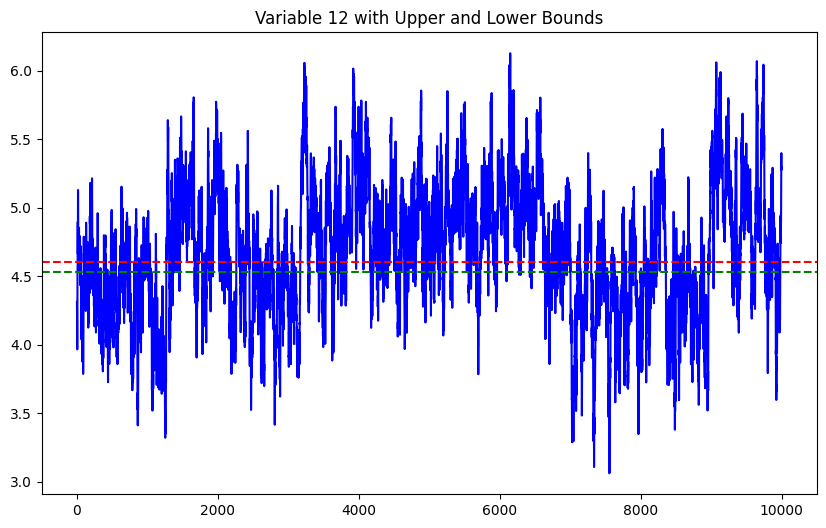

In [263]:
psi = psi.reshape(309700, 25)

plt.figure(figsize=(10,6))
plt.plot(psi[:10000,0], label='Variable 21', color='blue')
plt.axhline(y=upper_bounds[0], color='red', linestyle='--', label='Upper Bound')
plt.axhline(y=lower_bounds[0], color='green', linestyle='--', label='Lower Bound')
plt.title('Variable 12 with Upper and Lower Bounds')
plt.show()

In [264]:
print(psi.shape)

(309700, 25)


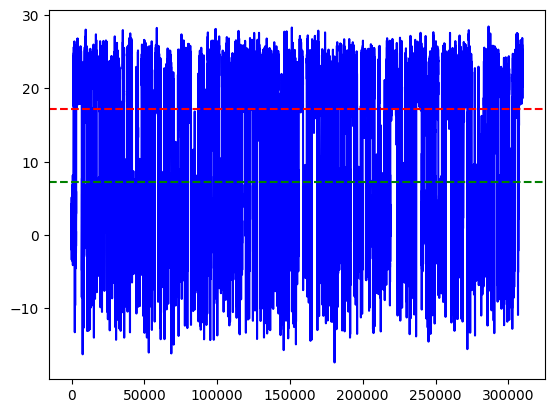

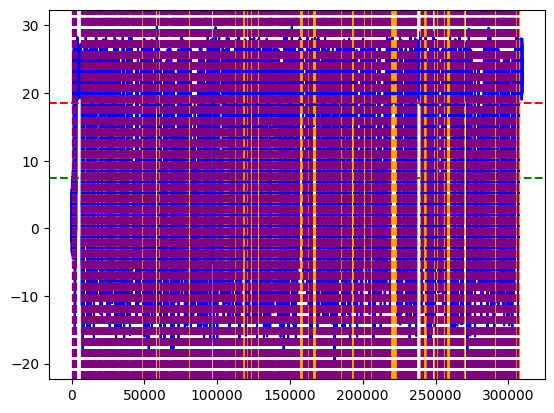

874 A states
842 B states
1716 Transition states


In [265]:
num_time_steps = psi.shape[0]

plt.Figure(figsize=(10, 6))
plt.plot(psi[:num_time_steps, 12], label='Variable 21', color='blue')
plt.axhline(y=upper_bounds[12], color="red", linestyle='--', label="Upper Bound")
plt.axhline(y=lower_bounds[12], color="green", linestyle='--', label="Lower Bound")
plt.show()

cpsi = psi[:num_time_steps, :]

st_start = 0 # start of the state
st_stop  = 0 # end of the state
tr_start = 0 # transition start
tr_stop  = 0 # transition stop

# for v in range (0, 25):

v = 13

bl       = None # below lower bound
au       = None # above upper bound
ints     = False # inside the bounds

A_states = [] # list of A states
B_states = [] # list of B states
T_states = [] # list of transition states

if cpsi[0, v] < lower_bounds[v]:
    bl = True
    au = False
elif cpsi[0, v] > upper_bounds[v]:
    au = True
    bl = False

for i in range(0, num_time_steps):
    if cpsi[i, v] < lower_bounds[v] and ints is True:

        tr_stop  = i
        st_start = i
        bl       = True

        T_states.append((tr_start, tr_stop))
        ints = False
        
    if cpsi[i, v] > upper_bounds[v] and ints is True:

        tr_stop  = i
        st_start = i
        au       = True

        T_states.append((tr_start, tr_stop))
        ints = False

    if ((cpsi[i, v] < upper_bounds[v] and au is True) or 
        (cpsi[i, v] > lower_bounds[v] and bl is True)):

        st_stop  = i
        tr_start = i
        ints     = True

        if au is True:
            A_states.append((st_start, st_stop))
            au = False

        if bl is True:
            B_states.append((st_start, st_stop))
            bl = False

plt.Figure(figsize=(10, 6))
plt.plot(psi[:num_time_steps, 13], label='Variable 21', color='blue')
plt.axhline(y=upper_bounds[13], color="red", linestyle='--', label="Upper Bound")
plt.axhline(y=lower_bounds[13], color="green", linestyle='--', label="Lower Bound")
for state in A_states:
    start, stop = state
    plt.axvline(x=stop, color='orange', linestyle='--', label='A State End' if state == A_states[0] else "")
for state in B_states:
    start, stop = state
    plt.axvline(x=stop, color='purple', linestyle='--', label='B State End' if state == B_states[0] else "")    
plt.show()

print(len(A_states), "A states")
print(len(B_states), "B states")
print(len(T_states), "Transition states")

In [266]:
import matplotlib.gridspec as gridspec

psi = np.load("/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/data/actual/long_run_310k.npy")
psi = psi[:,1,:]

# for variable in range(0, 25):
#     fig = plt.figure(figsize=(24, 10))
#     gs = gridspec.GridSpec(1, 3, figure=fig)
#     psi_r = fig.add_subplot(gs[0, 0])
#     psi_r.plot(psi[:5000, variable], label=f'Variable {variable + 1}', alpha=0.5)
#     psi_i = fig.add_subplot(gs[0, 1])
#     psi_i.plot(psi[:5000, variable+25], label=f'Variable {variable + 1}', alpha=0.5)
#     zonal_wind = fig.add_subplot(gs[0, 2])
#     zonal_wind.plot(psi[:5000, variable+50], label=f'Variable {variable + 1}', alpha=0.5)
#     plt.show()

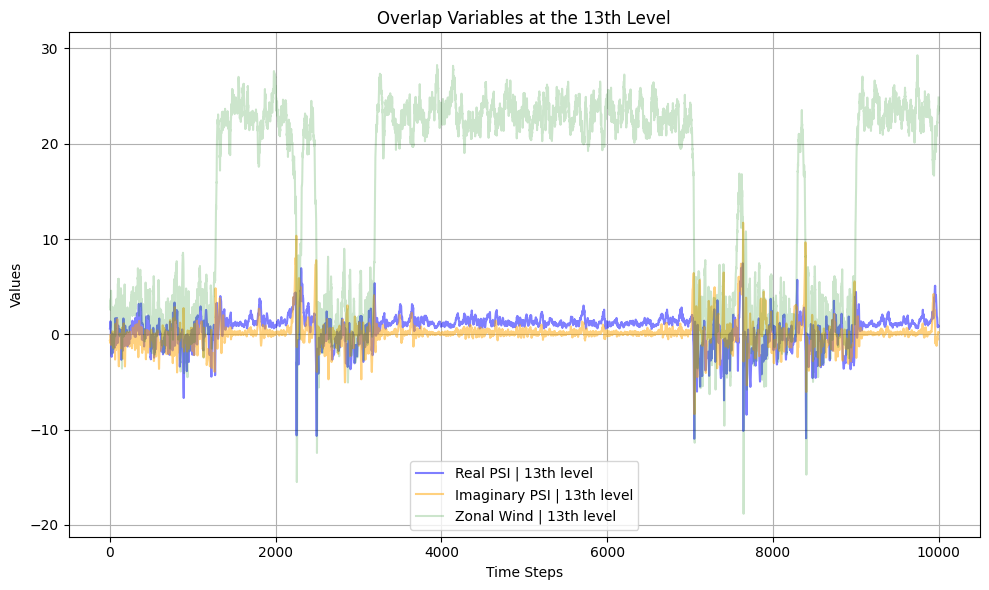

In [267]:
plt.figure(figsize=(10,6))
variable = 13
plt.plot(psi[:10000, 13], label='Real PSI | 13th level', alpha=0.5, color='blue')
plt.plot(psi[:10000, 13+25], label='Imaginary PSI | 13th level', alpha=0.5, color='orange')
plt.plot(psi[:10000, 13+50], label='Zonal Wind | 13th level', alpha=0.2, color='green')
plt.title('Overlap Variables at the 13th Level')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [268]:
A_length = 0
for state in A_states:
    start, stop = state
    length = stop - start
    A_length += length
print("A state length:", A_length)
B_length = 0
for state in B_states:
    start, stop = state
    length = stop - start
    B_length += length
print("B state length:", B_length)
T_length = 0
for state in T_states:
    start, stop = state
    length = stop - start
    T_length += length
print("Transition state length:", T_length)

A state length: 148553
B state length: 141066
Transition state length: 17746


In [269]:
pred = np.load("/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/predictions_best_checkpoint_and_cycle_Resnet_VAE_temp.npy")
pred = pred[:, 50:75]
print(pred.shape)

psi = np.load("/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/data/actual/long_run_310k.npy")
psi = psi[:300000, 1, 50:75]
print(psi.shape)

(300000, 25)
(300000, 25)


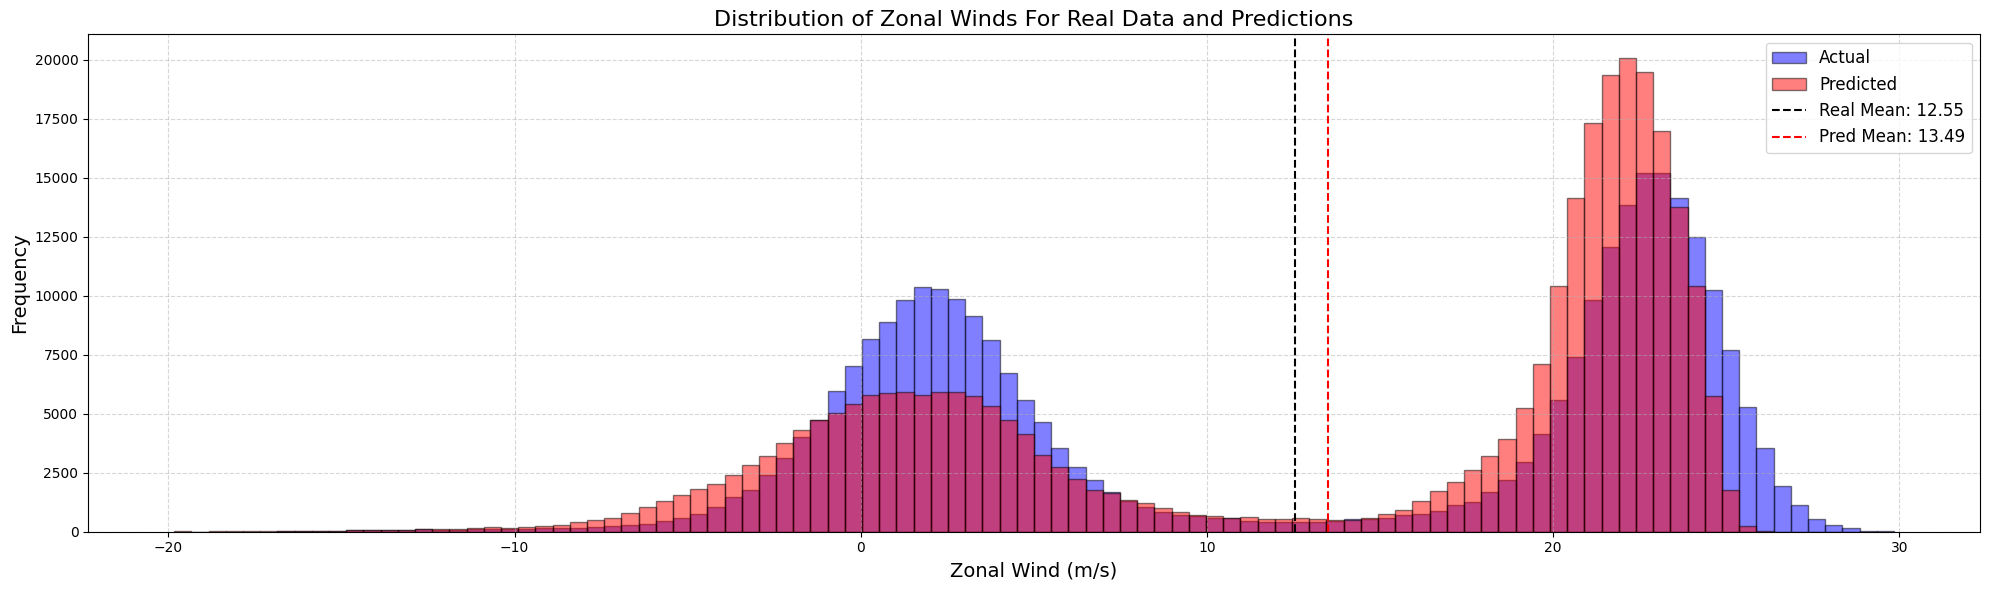

(100,)
[   11     9    10    18    14    34    45    36    45    44    77    77
    70    80   106   109   121   146   183   163   184   257   305   392
   498   598   806  1045  1297  1558  1804  2035  2383  2812  3202  3744
  4330  4722  5051  5400  5792  5874  5933  5801  5922  5921  5755  5308
  4715  4141  3265  2755  2226  1782  1638  1357  1205   991   855   721
   675   602   620   536   541   589   551   483   486   586   766   915
  1299  1727  2108  2607  3199  3916  5227  7090 10392 14142 17313 19338
 20074 19473 16986 13749 10423  5769  1786   223    10     0     0     0
     0     0     0     0]
299979


In [270]:
import seaborn as sns

level = 13
actual_hist, bins = np.histogram(psi[:, level], bins=100)
pred_hist, pred_bins = np.histogram(pred[:, level], bins=bins)

plt.figure(figsize=(20,6))
plt.hist(psi[:, level], bins=bins, alpha=0.5, label='Actual', color='blue', edgecolor='black')
plt.hist(pred[:, level], bins=bins, alpha=0.5, label='Predicted', color='red', edgecolor='black')

# Customize plot labels and title
plt.title('Distribution of Zonal Winds For Real Data and Predictions', fontsize=16)
plt.xlabel('Zonal Wind (m/s)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add vertical lines at means
plt.axvline(np.mean(psi[:, level]), color='black', linestyle='--', label=f'Real Mean: {np.mean(psi[:, level]):.2f}')
plt.axvline(np.mean(pred[:, level]), color='red', linestyle='--', label=f'Pred Mean: {np.mean(pred[:, level]):.2f}')

# Final plot settings
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(pred_hist.shape)
print(pred_hist)
print(np.sum(pred_hist))

In [271]:
condition = pred_bins > np.mean(pred[:, level])
new_pred_bins = pred_bins[condition]

desired_bins_loc = 100-len(new_pred_bins)+1
pred_hist = pred_hist[desired_bins_loc:]
actual_hist =  actual_hist[desired_bins_loc:]
print(pred_hist)

indices = np.where(pred_hist > actual_hist)
indices = list(indices[0])
print(indices)



[  486   586   766   915  1299  1727  2108  2607  3199  3916  5227  7090
 10392 14142 17313 19338 20074 19473 16986 13749 10423  5769  1786   223
    10     0     0     0     0     0     0     0]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [272]:
# indices = indices[6:]
print(indices)

pred_hist = pred_hist[indices]
actual_hist = actual_hist[indices]
removal_hist =  pred_hist - actual_hist
print(removal_hist)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[  64  185  210  547  864  992 1368 1495 1740 2262 2943 4803 6755 7477
 7283 6214 4254 1767]


In [273]:
print(np.sum(removal_hist[6:]))
print(pred_hist[0] - actual_hist[0])

48361
64


In [274]:
bound_value = new_pred_bins[indices][6]
print(bound_value)

17.424360977519353


In [275]:
removal_factor = np.sum(removal_hist[6:])/A_length
print(np.sum(removal_hist[6:]))
print(removal_factor)
removal_factor = round(removal_factor, 1)
print(removal_factor)
print(np.sum(removal_hist[6:]) * 0.3 / (np.sum(removal_hist[6:])/A_length))

48361
0.32554711113205387
0.3
44565.9


In [276]:
print(A_states)

[(1290, 1324), (1325, 1326), (1330, 1786), (1793, 1794), (1801, 2205), (2222, 2223), (2325, 2327), (2328, 2472), (3204, 3299), (3300, 7032), (7033, 7034), (7035, 7036), (8305, 8367), (8368, 8369), (9009, 9927), (9950, 9952), (9953, 10728), (10743, 10746), (11114, 11115), (11116, 11118), (11119, 11149), (12223, 12233), (12234, 12235), (12259, 12644), (12787, 13262), (13263, 13264), (13273, 13278), (15029, 15337), (15343, 15344), (15355, 15357), (16431, 16603), (16606, 16618), (16623, 16630), (16644, 17353), (19127, 19373), (19374, 19375), (19376, 19377), (19378, 19400), (19405, 19765), (19775, 19776), (19777, 19813), (19871, 20160), (21483, 22033), (22034, 22035), (22040, 22067), (22068, 22153), (22197, 22550), (22551, 22554), (22556, 22562), (22773, 22981), (22982, 23442), (23444, 23450), (23456, 23466), (23470, 24476), (24479, 24480), (24484, 24485), (24486, 24494), (24495, 24504), (25799, 25867), (25868, 25877), (25904, 25934), (25935, 26209), (26214, 26232), (27256, 27862), (27864, 

In [277]:
import math

new_psi = psi.copy()
indices_to_remove = []

for state in A_states:

    start, stop = state
    length = stop - start
    temp_stop = length
    temp_start = 0
    removal_length = math.floor(length * removal_factor)
    lst = []
    removal_start = 0
    removal_stop = 0

    if length % 2 == 0 and removal_length >= 3:
        mid = (temp_start + temp_stop) / 2 -1
        removal_start = math.ceil(mid - removal_length // 2)
        removal_stop = math.floor(mid + removal_length // 2)

    if length % 2 == 1 and removal_length >= 3:
        mid = (temp_start + temp_stop) / 2
        removal_start = math.ceil(mid - removal_length // 2)
        removal_stop = math.floor(mid + removal_length // 2)

    if removal_length >= 3:
        print(start, stop, length, temp_start, temp_stop, removal_length, removal_start, removal_stop)
        ind = np.arange(start + removal_start, start + removal_stop + 1, 1)
        indices_to_remove.extend(ind)


1290 1324 34 0 34 10 11 21
1330 1786 456 0 456 136 159 295
1801 2205 404 0 404 121 141 261
2328 2472 144 0 144 43 50 92
3204 3299 95 0 95 28 34 61
3300 7032 3732 0 3732 1119 1306 2424
8305 8367 62 0 62 18 21 39
9009 9927 918 0 918 275 321 595
9953 10728 775 0 775 232 272 503
11119 11149 30 0 30 9 10 18
12223 12233 10 0 10 3 3 5
12259 12644 385 0 385 115 136 249
12787 13262 475 0 475 142 167 308
15029 15337 308 0 308 92 107 199
16431 16603 172 0 172 51 60 110
16606 16618 12 0 12 3 4 6
16644 17353 709 0 709 212 249 460
19127 19373 246 0 246 73 86 158
19378 19400 22 0 22 6 7 13
19405 19765 360 0 360 108 125 233
19777 19813 36 0 36 10 12 22
19871 20160 289 0 289 86 102 187
21483 22033 550 0 550 165 192 356
22040 22067 27 0 27 8 10 17
22068 22153 85 0 85 25 31 54
22197 22550 353 0 353 105 125 228
22773 22981 208 0 208 62 72 134
22982 23442 460 0 460 138 160 298
23456 23466 10 0 10 3 3 5
23470 24476 1006 0 1006 301 352 652
25799 25867 68 0 68 20 23 43
25904 25934 30 0 30 9 10 18
25935 26209 

In [278]:
print(len(indices_to_remove))
indices_to_remove = np.array(indices_to_remove)
print(indices_to_remove.shape)
indices_to_remove = np.tile(indices_to_remove, (75, 1)).T
print(indices_to_remove.shape)

44027
(44027,)
(44027, 75)


In [279]:
psi = np.load("/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/data/actual/long_run_310k.npy")
psi = psi[:,1,:]
print(psi.shape)
psi = np.delete(psi, indices_to_remove, axis=0)


(309700, 75)


In [280]:
print(psi.shape)

(265673, 75)


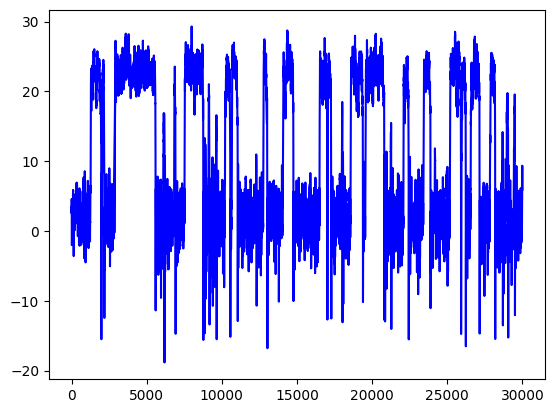

In [281]:
num_time_steps = 30000
plt.Figure(figsize=(10, 6))
plt.plot(psi[:num_time_steps, 63], label='Variable 21', color='blue')
plt.show()

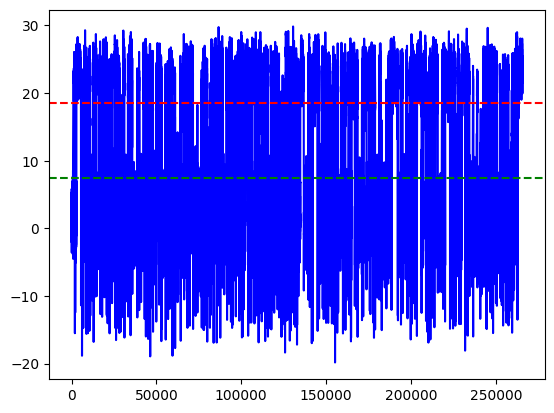

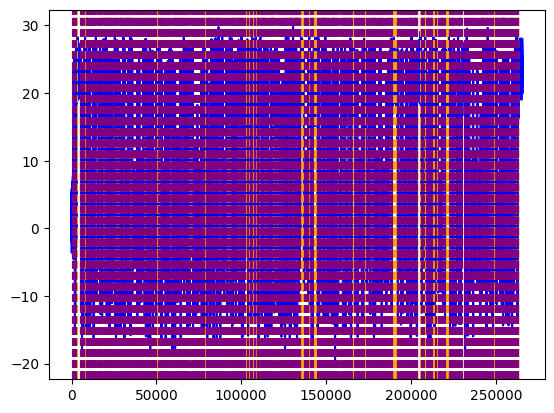

874 A states
842 B states
1716 Transition states


In [282]:
num_time_steps = psi.shape[0]

cpsi = psi[:num_time_steps, 50:75]

plt.Figure(figsize=(10, 6))
plt.plot(cpsi[:num_time_steps, 13], label='Variable 21', color='blue')
plt.axhline(y=upper_bounds[13], color="red", linestyle='--', label="Upper Bound")
plt.axhline(y=lower_bounds[13], color="green", linestyle='--', label="Lower Bound")
plt.show()

st_start = 0 # start of the state
st_stop  = 0 # end of the state
tr_start = 0 # transition start
tr_stop  = 0 # transition stop

# for v in range (0, 25):

v = 13

bl       = None # below lower bound
au       = None # above upper bound
ints     = False # inside the bounds

A_states = [] # list of A states
B_states = [] # list of B states
T_states = [] # list of transition states

if cpsi[0, v] < lower_bounds[v]:
    bl = True
    au = False
elif cpsi[0, v] > upper_bounds[v]:
    au = True
    bl = False

for i in range(0, num_time_steps):
    if cpsi[i, v] < lower_bounds[v] and ints is True:

        tr_stop  = i
        st_start = i
        bl       = True

        T_states.append((tr_start, tr_stop))
        ints = False
        
    if cpsi[i, v] > upper_bounds[v] and ints is True:

        tr_stop  = i
        st_start = i
        au       = True

        T_states.append((tr_start, tr_stop))
        ints = False

    if ((cpsi[i, v] < upper_bounds[v] and au is True) or 
        (cpsi[i, v] > lower_bounds[v] and bl is True)):

        st_stop  = i
        tr_start = i
        ints     = True

        if au is True:
            A_states.append((st_start, st_stop))
            au = False

        if bl is True:
            B_states.append((st_start, st_stop))
            bl = False

plt.Figure(figsize=(10, 6))
plt.plot(cpsi[:num_time_steps, 13], label='Variable 21', color='blue')
for state in A_states:
    start, stop = state
    plt.axvline(x=stop, color='orange', linestyle='--', label='A State End' if state == A_states[0] else "")
for state in B_states:
    start, stop = state
    plt.axvline(x=stop, color='purple', linestyle='--', label='B State End' if state == B_states[0] else "")    
plt.show()

print(len(A_states), "A states")
print(len(B_states), "B states")
print(len(T_states), "Transition states")

In [ ]:
A_length = 0
for state in A_states:
    start, stop = state
    length = stop - start
    A_length += length
print("A state length:", A_length)
B_length = 0
for state in B_states:
    start, stop = state
    length = stop - start
    B_length += length
print("B state length:", B_length)
T_length = 0
for state in T_states:
    start, stop = state
    length = stop - start
    T_length += length
print("Transition state length:", T_length)

A state length: 104526
B state length: 141066
Transition state length: 17746


In [ ]:
np.save("/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/data/actual/long_run_310k_finetuned_01.npy", psi)
reduced_A_psi = psi.copy()

# REDUCING TRANSITIONS TO RESTORE RATE

In [286]:
print(T_length)
print(T_length - (T_length * (1-removal_factor)))

psi = np.load("/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/data/actual/long_run_310k.npy")
psi = psi[:,1,:]
print(psi.shape)

17746
5323.800000000001
(309700, 75)


In [287]:
print(T_states)

[(805, 807), (876, 887), (1273, 1290), (1313, 1314), (1315, 1319), (1638, 1645), (1646, 1653), (1936, 1953), (1954, 1981), (2003, 2006), (2027, 2056), (2058, 2059), (2160, 2181), (2319, 2322), (2511, 2521), (2876, 2892), (2959, 2960), (5573, 5574), (5575, 5576), (5577, 5591), (5724, 5726), (6102, 6182), (6206, 6221), (6375, 6376), (6828, 6846), (6889, 6890), (6891, 6919), (7516, 7531), (8174, 8197), (8199, 8200), (8743, 8758), (8761, 8768), (8848, 8871), (8895, 8928), (8953, 8954), (9110, 9129), (9130, 9131), (9133, 9134), (9155, 9179), (9202, 9203), (9373, 9391), (9392, 9394), (9533, 9545), (9616, 9651), (9746, 9753), (10211, 10229), (10236, 10237), (10238, 10262), (10533, 10562), (10661, 10676), (11009, 11010), (11011, 11020), (11025, 11055), (11080, 11087), (11586, 11589), (11590, 11594), (12286, 12309), (12530, 12532), (12535, 12536), (12659, 12664), (12759, 12776), (12991, 12997), (12998, 13009), (13011, 13027), (13997, 14008), (14062, 14064), (14065, 14085), (14206, 14209), (1421

In [ ]:
lst_for_avg = []
for state in T_states:
    start, stop = state
    length = stop - start
    lst_for_avg.append(length)

t_avg = np.mean(lst_for_avg)
print("Average transition length:", t_avg)

lst_for_avg = []
for state in A_states:
    start, stop = state
    length = stop - start
    if length <= t_avg:
        lst_for_avg.append(length)

print("Average A state length:", np.mean(lst_for_avg))

Average transition length: 10.341491841491841


In [ ]:
indices_to_remove = []
for state in T_states:
    start, stop = state
    length = stop - start
    if length < t_avg - 2:
        

# FINETUNING

In [ ]:
import numpy as np
import h5py
import numpy as np
from scipy.integrate import solve_ivp
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import sys
import torch
import matplotlib.pyplot as plt
from torch.amp import GradScaler, autocast

psi = np.load("/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/data/actual/long_run_310k_finetuned_01.npy")

# Normalization
mean_psi = np.mean(psi, axis=0, keepdims=True)
std_psi = np.std(psi, axis=0, keepdims=True)
psi = (psi - mean_psi) / std_psi

# Pre-processing

lead = 1
trainN = 200000
valN = 50000
index = 63

# Defining the variable ranges
variable_range = [(0,24), (25, 49), (50, 74), (0, 49), (0,74)]

# Select the variable: 0 for real perturbation, 1 for imaginary perturbation, 2 for zonal winds
variable = 3
num_variables = variable_range[variable][1] - variable_range[variable][0] + 1
print(num_variables)

# Shuffle and map indices
np.random.seed(42)
valid_indices = np.arange(0, trainN - lead)
shuffled_indices = np.random.permutation(valid_indices)

# Now constrain the shuffled indices to the variable range
np_psi_train_input = psi[shuffled_indices, variable_range[variable][0]:variable_range[variable][1]+1]
np_psi_train_label = psi[shuffled_indices + lead, :]

psi_train_input = torch.tensor(np_psi_train_input)
psi_train_label = torch.tensor(np_psi_train_label)

np_psi_val_input = psi[trainN:trainN+valN, variable_range[variable][0]:variable_range[variable][1]+1]
np_psi_val_label = psi[trainN+lead:trainN+valN+lead, :]
psi_val_input = torch.tensor(np_psi_val_input)
psi_val_label =  torch.tensor(np_psi_val_label)

print(psi.shape)
print(psi_train_input.shape)
print(psi_train_label.shape)
print(psi_val_input.shape)
print(psi_val_label.shape)

In [ ]:
class Encoder(nn.Module):
    def __init__(self, latent_dim):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(75, 512)  # Input layer (2 + 2) -> Hidden layer (128)
        self.fc2 = nn.Linear(512, 512)  # Hidden layer (128) -> Hidden layer (128)
        self.fc3 = nn.Linear(512, 512)  # Hidden layer (128) -> Hidden layer (128)
        self.fc4 = nn.Linear(512, 512)  # Hidden layer (128) -> Hidden layer (128)
        self.fc5 = nn.Linear(512, 512)  # Hidden layer (128) -> Hidden layer (128)
        self.fc6 = nn.Linear(512, 512)  # Hidden layer (128) -> Hidden layer (128)
        self.fc_mu = nn.Linear(512, latent_dim)  # Hidden layer (128) -> Latent space (2)
        self.fc_logvar = nn.Linear(512, latent_dim)  # Hidden layer (128) -> Log variance (2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Activation function for hidden layer
        x = torch.relu(self.fc2(x)) + x
        x = torch.relu(self.fc3(x)) + x
        x = torch.relu(self.fc4(x)) + x
        # x = torch.relu(self.fc5(x)) + x
        # x = torch.relu(self.fc6(x)) + x
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

# Define the decoder (MLP)
class Decoder(nn.Module):
    def __init__(self, latent_dim, output_dim, condition_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim + condition_dim, 512)  # Input layer (2 + 2) -> Hidden layer (128)
        self.fc2 = nn.Linear(512, 512)  # Hidden layer (128) -> Hidden layer (128)
        self.fc3 = nn.Linear(512, 512)  # Hidden layer (128) -> Hidden layer (128)
        self.fc4 = nn.Linear(512, 512)  # Hidden layer (128) -> Hidden layer (128)
        self.fc5 = nn.Linear(512, 512)  # Hidden layer (128) -> Hidden layer (128)
        self.fc6 = nn.Linear(512, 512)  # Hidden layer (128) -> Hidden layer (128)
        self.fc_output = nn.Linear(512, output_dim)  # Hidden layer (128) -> Output layer (2)

    def forward(self, z, condition):
        z = torch.cat((z, condition), dim=1)  # Concatenate latent vector and condition
        z = torch.relu(self.fc1(z))  # Activation function for hidden layer
        z = torch.relu(self.fc2(z)) + z
        z = torch.relu(self.fc3(z)) + z
        z = torch.relu(self.fc4(z)) + z
        # z = torch.relu(self.fc5(z)) + z
        # z = torch.relu(self.fc6(z)) + z
        output = self.fc_output(z)
        return output

# Define the VAE model
class ConditionalVAE(nn.Module):
    def __init__(self, latent_dim, output_dim, condition_dim):
        super(ConditionalVAE, self).__init__()
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim, output_dim, condition_dim)

    def encode(self, x):
        mu, logvar = self.encoder(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z, condition):
        return self.decoder(z, condition)

    def forward(self, x, condition):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        output = self.decode(z, condition)
        return output, mu, logvar

output_dim = 75
latent_dim = 32
condition_dim = num_variables
batch_size = 1024

In [ ]:
# CHOOSING BY EXP FIT
# TO-DO: Check if crps is correct

from scipy.stats import linregress

def normalize_transition_time(s, dlt, r):
    """
    Normalize the transition time based on the specified delta and reference value.

    Args:
        s (float): The transition time to normalize.
        dlt (float): The delta value for normalization.
        r (float): The reference value for normalization.

    Returns:
        norm (float): The normalized transition time.
    """
    norm = 1 - np.exp(-np.abs((s - r)) / dlt)
    return norm

# Code from Ira Shokar but slightly changed
def crps_score(p, y):
    """
    Calculate CRPS for given predictions and observations.

    Args:
        p (Tensor): Predictions, shape (N, D) where N = ens_num and D is the dimension of the prediction.
        y (Tensor): Observations, shape (D) where D is the dimension of the observation.

    Returns:
        crps (float): The CRPS score.
    """
    y  = y.unsqueeze(0)
    # First term: mean distance from observations to ensemble members
    mae     = torch.cdist(y, p, 1).mean()
    # Second term: mean distance between ensemble members (properly normalized)
    ens_var = torch.cdist(p, p, 1).mean()
    
    return mae - 0.5 * ens_var

# Function to calculate transition durations
def calculate_transition_durations(y, u, l):
    """
    Calculate the return periods with user-defined upper and lower bounds.

    Args:
        y (np.array): The time series data.
        u (float): The upper bound for the transition.
        l (float): The lower bound for the transition.

    Returns:
        t_times (list): The list of return periods for transitions.
    """

    t_times = []
    s = None
    above_u = False
    below_l = False
    for i in range(1, len(y)):
        if y[i] < l:  
            below_l = True
            above_u = False
        elif y[i] > u:  
            if below_l and s is not None:
                t_times.append(i - s)
                s = None  
            above_u = True
            below_l = False

        if below_l and s is None:
            s = i
    return t_times

def KL_coefficient(r, p, delta, cycle, KL_by_dim_cycle):
    """
    Calculate the KL divergence between two distributions and normalize it.

    Args:
        r (np.array): Real distribution.
        p (np.array): Predicted distribution.
        delta (float): Delta value for normalization.
        cycle (int): Cycle number for tracking.
        KL_by_dim_cycle (dict): Dictionary to store KL divergence values by dimension and cycle.

    Returns:
        r (np.array): Processed real distribution.
        p (np.array): Processed predicted distribution.
        nkl (float): Normalized KL divergence.
    """
    # Calculating KL divergence
    r = r[:30000, 1, 63]
    p = p[:30000]
    
    rh, b = np.histogram(r, bins=100, density=True)
    ph, _ = np.histogram(p, bins=b, density=True)

    e = 1e-10
    rh += e
    ph += e

    # Calculate KL divergence between the two histograms
    kl = np.sum(rh * np.log(rh / ph))
    nkl = normalize_transition_time(kl, 1, 0)

    print(f"Normalized KL divergence for delta {delta}, cycle {cycle}: {nkl:.6f}")
    KL_by_dim_cycle[delta][cycle].append(nkl)

    return r, p, nkl

def CCDF_fit(p_times, s):
    """
    Calculate the slope of the CCDF of transition times and normalize it.

    Args:
        p_times (list): Transition times from predictions.
        s (float): Real value for normalization.
    
    Returns:
        np_slope (float): Normalized slope of the CCDF.
    """
    # === PREDICTIONS CCDF AND FIT ===
    if len(p_times) > 0 and len(np.unique(p_times)) > 1:
        sp_times = np.sort(p_times)
        p_ccdf = 1 - np.arange(1, len(sp_times) + 1) / len(sp_times)

        p_v_indices = p_ccdf > 0
        px_fit = sp_times[p_v_indices]
        py_fit = np.log(p_ccdf[p_v_indices])

        p_slope, _, *_ = linregress(px_fit, py_fit)
        np_slope = normalize_transition_time(p_slope, 0.005, s)
        return np_slope

    else:
        print("No transitions detected in predictions for CCDF slope evaluation.")

def Mean_and_std_of_predictions(p_times, r_times, dlt, cc, transitions_by_dim_cycle, transitions_normalized_by_dim_cycle, transitions_normalized_std_by_dim_cycle):
    """
    Calculate the mean and standard deviation of transition times from predictions and normalize them.

    Args:
        p_times (list): Transition times from predictions.
        r_times (list): Transition times from real data.
        dlt (float): Delta value for normalization.
        cc (int): Cycle number for tracking.
        transitions_by_dim_cycle (dict): Dictionary to store transition times by dimension and cycle.
        transitions_normalized_by_dim_cycle (dict): Dictionary to store normalized transition times by dimension and cycle.
        transitions_normalized_std_by_dim_cycle (dict): Dictionary to store normalized standard deviations by dimension and cycle.

    Returns:
        npd_mean (float): Normalized mean of transition times.
        npd_std (float): Normalized standard deviation of transition times.
    """
    p_mean = np.mean(p_times)
    p_std = np.std(p_times)

    pd_mean = abs(p_mean - np.mean(r_times))
    pd_std = abs(p_std - np.std(r_times))

    npd_mean = normalize_transition_time(pd_mean, 1000, np.mean(r_times))
    npd_std = normalize_transition_time(pd_std, 1000, np.std(r_times))

    npd_std = 1 if npd_std == 0 else npd_std

    transitions_by_dim_cycle[dlt][cc].append(pd_mean)
    transitions_normalized_by_dim_cycle[dlt][cc].append(npd_mean)
    transitions_normalized_std_by_dim_cycle[dlt][cc].append(npd_std)

    return npd_mean, npd_std

# KL Annealing (FROM PAPER)
def frange_cycle_linear(start, stop, n_epoch, n_cycle=4, ratio=0.5):
    """
    Generate a linear schedule for KL annealing over multiple cycles.

    Args:
        start (float): Starting value of the schedule.
        stop (float): Stopping value of the schedule.
        n_epoch (int): Total number of epochs.
        n_cycle (int): Number of cycles for the schedule.
        ratio (float): Ratio of the cycle length to the total number of epochs.

    Returns:
        L (np.array): Array containing the linear schedule values for each epoch.
    """
    L = np.ones(n_epoch)
    period = n_epoch/n_cycle
    step = (stop-start)/(period*ratio) # linear schedule

    for c in range(n_cycle):

        v , i = start , 0
        while v <=stop and (int(i+c*period) < n_epoch):
            L[int(i+c*period)] = v
            v += step
            i += 1
    return L
from matplotlib import gridspec
import seaborn as sns
import os

def Timeseries_plot(y, p, ep, ax):
    """
    Plot the timeseries.

    Args:
        y (np.array): Actual zonal wind values.
        p (np.array): Predicted zonal wind values.
        ep (int): Current epoch number.
        ax (matplotlib.axes.Axes): Axes object to plot on.

    Returns:
        None. Just plots the timeseries on the provided axes.
    """
    ax.plot(y, 'b', label='Actual')
    ax.plot(p, 'r', label='Predictions')

    ax.set_title(f"Timeseries | Epoch {ep}", fontsize=16)
    ax.set_xlabel('Time Step', fontsize=14)
    ax.set_ylabel('Zonal Wind Value', fontsize=14)

    ax.legend(['Predictions', 'Actual'])
    ax.grid(True)

    # save_path = os.path.join(folder, "timeseries")
    # save_path = os.path.join(save_path, f"timeseries_plot_{epoch+1}.png")

    # plt.savefig(save_path)

    # plt.show()75

def PDF_plot(y, p, ep, pdf_dt, ax):
    """
    Plot PDFs of the zonal wind values.

    Args:
        y (np.array): Actual zonal wind values.
        p (np.array): Predicted zonal wind values.
        ep (int): Current epoch number.
        pdf_dt (float): KL divergence between the PDFs of actual and predicted values.
        ax (matplotlib.axes.Axes): Axes object to plot on.

    Returns:
        None. Just plots the PDFs on the provided axes.
    """

    sns.histplot(y, bins=100, kde=True, color='black', alpha=0.6, element='step', label='Real Data', ax=ax)
    sns.histplot(p, bins=100, kde=True, color='red', alpha=0.6, element='step', label='Predictions', ax=ax)

    ax.set_title(f"Probability Distribution Functions (PDFs) | Epoch {ep} | KL Error: {pdf_dt:.4f}", fontsize=16)
    ax.set_xlabel('Zonal Wind (m/s)', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    
    ax.axvline(np.mean(y), color='black', linestyle='--', label=f'Real Mean: {np.mean(y):.2f}')
    ax.axvline(np.mean(p), color='red', linestyle='--', label=f'Pred Mean: {np.mean(p):.2f}')

    ax.legend(fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)

    # save_path = os.path.join(folder, "bi_modal_distri")
    # save_path = os.path.join(save_path, f"bi_modal_distribution_plot_{epoch+1}.png")
    # plt.savefig(save_path)

    # plt.show()

def Exp_fit_plot(xlp, yvp, xlr, yvr, p_exp_fit, r_exp_fit, ep, exp_d, range_d, ax):
    """
    Plot the exponential fits of transition return periods.

    Args:
        xlp (np.array): X values for predicted exponential fit.
        yvp (np.array): Y values for predicted exponential fit.
        xlr (np.array): X values for real exponential fit.
        yvr (np.array): Y values for real exponential fit.
        p_exp_fit (float): Slope of the predicted exponential fit.
        r_exp_fit (float): Slope of the real exponential fit.
        ep (int): Current epoch number.
        exp_d (float): Exponential fit error for predictions.
        range_d (float): Range error for predictions.
        ax (matplotlib.axes.Axes): Axes object to plot on.

    Returns:
        None. Just plots the exponential fits on the provided axes.
    """
    ax.plot(xlp, yvp, 'r-', label=f'Pred Exp Fit (slope={p_exp_fit:.4f})', linewidth=2)
    ax.plot(xlr, yvr, 'b-', label=f'Real Exp Fit (slope={r_exp_fit:.4f})', linewidth=2)

    ax.set_xlabel('Time Duration (Steps)')
    ax.set_ylabel('Exponential Fit')
    ax.set_title(f"Exponential Fits of Transition Return Periods | Epoch {ep} | Exp Error: {exp_d:.4f} | Range Error: {range_d:.4f}", fontsize=16)
   
    ax.set_yscale("linear")  # y-axis log scale
    ax.set_xscale("linear")  # x-axis linear scale
    
    ax.grid()
    ax.legend()
    
    # save_path = os.path.join(folder, "expo_fit")
    # save_path = os.path.join(save_path, f"expo_fit_plot_{epoch}.png")
    # plt.savefig(save_path)
    # plt.show()

def Final_avg_transition_plot(transitions_by_dim_cycle, r, dlt, ncc, f):
    """
    Plot the average transition values across all cycles.

    Args:
        transitions_by_dim_cycle (dict): Dictionary containing transition values by dimension and cycle.
        r (float): Real data value for comparison.
        dlt (float): Delta coefficient for normalization.
        ncc (int): Number of cycles.
        f (str): Folder path to save the plot.
    
    Returns:
        None. Just plots the average transition values and saves the figure.
    """
    plt.figure(figsize=(10, 6))
    for c in range(ncc):
        plt.plot(transitions_by_dim_cycle[dlt][c], 'o-', label=f'Cycle {c}')
    
    plt.axhline(y=r, color='r', linestyle='--', label='Real Data')

    plt.xlabel('Epoch within Cycle')
    plt.ylabel('Average Transition Value')
    plt.ylim(0.1,2000)
    plt.title(f'Average Transition Progress (Delta Coefficient={dlt})')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    f = os.path.join(f, f"transition_plot_all_cycles.png")
    plt.savefig(f)

    plt.show()

def Final_exp_fit_plot(exp_fit_by_dim_cycle, r_exp_fit, dlt, ncc, f):
    """
    Plot the exponential fit values across all cycles.

    Args:
        exp_fit_by_dim_cycle (dict): Dictionary containing exponential fit values by dimension and cycle.
        r_exp_fit (float): Real data value for comparison.
        dlt (float): Delta coefficient for normalization.
        ncc (int): Number of cycles.
        f (str): Folder path to save the plot.

    Returns:
        None. Just plots the exponential fit values and saves the figure.
    """
    plt.figure(figsize=(10, 6))
    for c in range(ncc):
        plt.plot(exp_fit_by_dim_cycle[dlt][c], 'o-', label=f'Cycle {c}')
    
    plt.axhline(y=r_exp_fit, color='r', linestyle='--', label='Real Data')

    plt.xlabel('Epoch within Cycle')
    plt.ylabel('Exponential Fit Value')
    plt.title(f'Exponential Fit Progress (Delta Coefficient={dlt})')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()

    f = os.path.join(f, f"exponential_fit_plot_all_cycles.png")
    plt.savefig(f)
    
    plt.show()

def all_plot(y, p, xlp, yvp, xlr, yvr, 
             p_exp_fit, r_exp_fit, pdf_dt, exp_dt, range_dt, ep, folder):
    """
    Comprehensive plot with timeseries, PDF, and exponential fit.

    Args:
        y (np.array): Actual zonal wind values.
        p (np.array): Predicted zonal wind values.
        xlp (np.array): X values for predicted exponential fit.
        yvp (np.array): Y values for predicted exponential fit.
        xlr (np.array): X values for real exponential fit.
        yvr (np.array): Y values for real exponential fit.
        p_exp_fit (float): Slope of the predicted exponential fit.
        r_exp_fit (float): Slope of the real exponential fit.
        pdf_dt (float): KL divergence between the PDFs of actual and predicted values.
        exp_dt (float): Exponential fit error for predictions.
        range_dt (float): Range error for predictions.
        ep (int): Current epoch number.
        folder (str): Folder path to save the plot.
    
    Returns:
        None. Just plots the timeseries, PDF, and exponential fit and saves the figure.
    """
    fig = plt.figure(figsize=(24, 10))
    gs = gridspec.GridSpec(2, 2, figure=fig, width_ratios=[1,1], height_ratios=[1,1])

    ax_timmeseries = fig.add_subplot(gs[:, 0])
    ax_pdf = fig.add_subplot(gs[0, 1])
    ax_exp_fit = fig.add_subplot(gs[1, 1])

    Timeseries_plot(y, p, ep, ax_timmeseries)
    PDF_plot(y, p, ep, pdf_dt, ax_pdf)
    Exp_fit_plot(xlp, yvp, xlr, yvr, 
                 p_exp_fit, r_exp_fit, ep, exp_dt, range_dt, ax_exp_fit)
    
    dt = np.sqrt(pdf_dt**2 + exp_dt**2 + range_dt**2)
    fig.suptitle(f"Predictions vs Actual | Epoch {ep} | Euclidean Metric Error: {dt}", fontsize=20)
    plt.subplots_adjust(wspace=0.2, hspace=0.35)  # Adjust these values as desired
    fig.tight_layout(pad=2.0)
    plt.savefig(os.path.join(folder, f"plots/all_plots_epoch_{ep}.png"))
    plt.show()

def Loss_plot(t_loss, v_loss, cc, dlt, f):
    """
    Plot the training and validation losses.

    Args:
        t_loss (list): Training loss values.
        v_loss (list): Validation loss values.
        cc (int): Cycle number for tracking.
        dlt (float): Delta value for normalization.
        f (str): Folder path to save the plot.
    
    Returns:
        None. Just plots the training and validation losses and saves the figure.
    """
    plt.figure(figsize=(10,6))

    plt.plot(t_loss, label='Training Loss')
    plt.plot(v_loss, label='Validation Loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Losses for Cycle {cc+1} with Delta {dlt}')
    plt.legend()

    f = os.path.join(f, f"loss_plot_cycle_{cc+1}_delta_{dlt}.png")
    plt.savefig(f)
    
    plt.show()

# TO-DO: Try to change KL metric to KS. Add all graphs in one figure and add the distance metric to the best model selection to it.

# Training

torch.cuda.empty_cache()

import datetime
import os
import shutil
from scipy.stats import linregress
import seaborn as sns
from matplotlib.gridspec import GridSpec

def model_restore(mp, model):
    """
    Restore the model state from a saved checkpoint.

    Args:
        mp (str): Path to the model checkpoint.
        model (nn.Module): The model to restore.

    Returns:
        None. The model state is loaded from the checkpoint if it exists.
    """
    if os.path.exists(mp):
        print(f"Loading model from {mp}")
        model.load_state_dict(torch.load(mp))

def inference(model, psi, tst, vr, v, nv, ld):
    """
    Perform inference using the trained model.

    Args:
        model (nn.Module): The trained model.
        psi (np.array): Input data for inference.
        tst (int): Number of time steps.
        vr (dict): Variable ranges for the input data.
        v (int): Index of the variable to use for inference.
        nv (int): Number of variables.
        ld (int): Latent dimension of the model.
    
    Returns:
        p (np.array): Predictions made by the model.
    """
    s, e = vr[v][0], vr[v][1]+1
    init_c = torch.reshape(torch.tensor(psi[0,s:e]), [1, nv])
    z = torch.zeros([1,ld])
    p = np.zeros ([tst, 75])

    for k in range (0, tst):

        with torch.inference_mode():
            model.eval()

            with autocast(device_type='cuda'):

                if (k ==0):

                    z = torch.randn_like(z).float().cuda(non_blocking=True)
                    init_c = init_c.float().cuda(non_blocking=True)

                    y = (model.decode(z, init_c)).detach().cpu().numpy()
                    p[k,:] = y

                    init_c = torch.tensor(y[:, s:e])

                else:
                    z = torch.randn_like(z).float().cuda(non_blocking=True)
                    init_c = torch.reshape(torch.tensor(p[k-1,s:e]),[1,nv]).float().cuda(non_blocking=True)

                    y = (model.decode(z,init_c)).detach().cpu().numpy()
                    p[k,:] = y

                    init_c = torch.tensor(y[:, s:e])
    
    return p

def euclidean_distance_for_predictions(ms):
    """
    Calculate the Euclidean distance for a list of metrics.

    Args:
        ms (list): List of computed metrics.

    Returns:
        dt (float): The Euclidean distance calculated from the given computed metrics.
    """
    s = 0
    for m in ms:
        s += m ** 2
    dt = np.sqrt(s)
    return dt

def save_best_cycle_epoch(models, dlt, cc, ep, f,
                          exp_fit_normalized_by_dim_cycle, 
                          KL_by_dim_cycle, duration_diff_by_dim_cycle, 
                          best_models_saved, best_models):
    """
    Select the best model from a cycle based on combined distance metrics and save it.

    Args:
        models (list): List of model paths for the current cycle.
        dlt (float): Delta coefficient for normalization.
        cc (int): Current cycle number.
        ep (int): Current epoch number.
        f (str): Folder path to save the best model.
        exp_fit_normalized_by_dim_cycle (dict): Dictionary containing normalized exponential fit values by dimension and cycle.
        KL_by_dim_cycle (dict): Dictionary containing KL divergence values by dimension and cycle.
        duration_diff_by_dim_cycle (dict): Dictionary containing range differences by dimension and cycle.
        best_models_saved (list): List to store the paths of the best models saved.
        best_models (list): List to store the best models selected.

    Returns:
        None. The best model is saved to the specified folder.
    """
    
    b_model = None
    b_i = -1
    b_dt = float('inf')

    for i in range(len(models)):  # models contains each epoch's model in the current cycle
        print(exp_fit_normalized_by_dim_cycle[dlt][cc][i])
        print(KL_by_dim_cycle[dlt][cc][i])
        print(duration_diff_by_dim_cycle[dlt][cc][i])
        ms = [exp_fit_normalized_by_dim_cycle[dlt][cc][i],
                   KL_by_dim_cycle[dlt][cc][i], 
                   duration_diff_by_dim_cycle[dlt][cc][i]]
        
        dt = euclidean_distance_for_predictions(ms)
        if dt < b_dt:
            b_dt = dt
            shutil.copyfile(models[i], f"{f}/best_model_combined_distance_at_cycle_{cc}_and_checkpoint_{ep}.pth")
            print(f"New best model saved with distance {dt:.4f} at epoch {i+1}")
            b_i = i
            b_model = models[i]

    if b_i != -1:
        best_models_saved.append(b_model)
        best_models.append((cc, b_i))

def save_best_epoch(best_models, best_models_saved, exp_fit_normalized_by_dim_cycle,
                    KL_by_dim_cycle, duration_diff_by_dim_cycle, dlt, mf):
    
    """
    Select the best model from the master training run based on combined distance metrics and save it.

    Args:
        models (list): List of model paths for the current cycle.
        dlt (float): Delta coefficient for normalization.
        cc (int): Current cycle number.
        ep (int): Current epoch number.
        f (str): Folder path to save the best model.
        exp_fit_normalized_by_dim_cycle (dict): Dictionary containing normalized exponential fit values by dimension and cycle.
        KL_by_dim_cycle (dict): Dictionary containing KL divergence values by dimension and cycle.
        duration_diff_by_dim_cycle (dict): Dictionary containing range differences by dimension and cycle.
        best_models_saved (list): List to store the paths of the best models saved.
        best_models (list): List to store the best models selected.

    Returns:
        None. The best model is saved to the specified folder.
    """

    print("Selecting the best model based on combined distance...")

    # Ensure best_models is not empty
    if not best_models:
        print("No best models found.")
        return
    
    # After all cycles - final best model selection
    b_model = None
    w_model = (-1, -1)
    b_model_dt = float('inf')

    print(f"Number of best models saved: {len(best_models)}")
    for idx, (cc, ep_idx) in enumerate(best_models):

        ms = [exp_fit_normalized_by_dim_cycle[dlt][cc][ep_idx], 
                   KL_by_dim_cycle[dlt][cc][ep_idx], 
                   duration_diff_by_dim_cycle[dlt][cc][ep_idx]]
        
        dt = euclidean_distance_for_predictions(ms)        
        print(f"Distance for model from cycle {cc+1}, epoch {ep_idx+1}: {dt:.4f}")
        print(f"Current best distance: {b_model_dt:.4f}")
        
        if dt < b_model_dt:
            b_model_dt = dt
            b_model = best_models_saved[idx]
            w_model = (cc, ep_idx)

    # Save the best model  
    i,n = w_model
    cc = i
    ep = n

    if cc == -1:
        print("No best model found.")
    else:
        shutil.copyfile(b_model, f"{mf}/best_model_combined_distance_with_cycle_{cc+1}_and_epoch_{ep+1}.pth")
        print(f"Best model saved with cycle {cc+1} and epoch {ep+1}.")

beta_kl_coef = frange_cycle_linear(0.01, 3, 500, 5, 1)
print(beta_kl_coef)
num_epochs = 500

In [ ]:

# Initialization
scaler          = GradScaler()

latent_dims     = [1024]
latent_dim      = 32
kl_coefficients = [0.1]
kl_coef         = 0.1
delta_coefs     = [1]
time_step       = 30000
num_cycles      = 1
ens_size        = 1
level           = 63
upper_bound     = 53.8 / 2.8935
lower_bound     = 7.41

TRAIN_N         = 200000
VAL_N           = 50000

restore         = True

best_distance   = float('inf')

real_data       = np.load(r"/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/data/actual/long_run_310k.npy")
real_data_1d    = real_data[:, 1, level]

# Function to calculate transition durations
real_durations      = calculate_transition_durations(real_data_1d, upper_bound, lower_bound)
real_data_sorted    = np.sort(real_durations)
transition_real     = np.mean(real_data_sorted)

actual_hist, bin_edges = np.histogram(real_data[:, 1, level], bins=100, density=True)
print(f"Reference Real Data average_transition_time: {transition_real}")

# Compute CCDF slope for real data
ccdf_real           = 1 - np.arange(1, len(real_data_sorted) + 1) / len(real_data_sorted)
valid_indices_real  = ccdf_real > 0
x_fit_real          = real_data_sorted[valid_indices_real]
y_fit_real          = np.log(ccdf_real[valid_indices_real])
slope_real, intercept_real, *_ = linregress(x_fit_real, y_fit_real)
print(f"Reference Real Data CCDF Slope: {slope_real}")

# Compute exponential fit for real data
x_line_real = np.linspace(min(real_data_sorted), max(real_data_sorted), 100)
exponential_fit_real = 1/np.mean(real_data_sorted)
y_values_real = exponential_fit_real*x_line_real

# Initialize dictionaries to store results
transitions_by_dim_cycle                = {dl: {cycle: [] for cycle in range(num_cycles)} for dl in delta_coefs}
transitions_normalized_by_dim_cycle     = {dl: {cycle: [] for cycle in range(num_cycles)} for dl in delta_coefs}
transitions_normalized_std_by_dim_cycle = {dl: {cycle: [] for cycle in range(num_cycles)} for dl in delta_coefs}
duration_diff_by_dim_cycle              = {dl: {cycle: [] for cycle in range(num_cycles)} for dl in delta_coefs}
exp_fit_by_dim_cycle                    = {dl: {cycle: [] for cycle in range(num_cycles)} for dl in delta_coefs}
exp_fit_normalized_by_dim_cycle         = {dl: {cycle: [] for cycle in range(num_cycles)} for dl in delta_coefs}
KL_by_dim_cycle                         = {dl: {cycle: [] for cycle in range(num_cycles)} for dl in delta_coefs}

models_by_dim_cycle = []
master_folder = f"/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/FINETUNING_Resnet_VAE_model_DELTA_TEST_at_{datetime.datetime.now()}"
os.makedirs(master_folder)

for delta in delta_coefs:
    print(f"USING DELTA COEF OF {delta}")

    best_models         = []
    best_models_saved   = []

    losses_training     = []
    losses_validation   = []

    for cycle in range(0,num_cycles):

        models = []

        # Initialize the model, optimizer, and loss function
        model       = ConditionalVAE(latent_dim, output_dim, condition_dim)
        model       = model.cuda()
        optimizer   = optim.Adam(model.parameters(), lr=0.0001)
        print(latent_dim, output_dim, condition_dim)

        # Create the folder structure for saving results
        subfolders  = ['plots','checkpoints']
        folder      = f"{master_folder}/model_at_{cycle}_with_delta_{delta}"
        os.makedirs(folder)
        for subfolder in subfolders:
            path = os.path.join(folder, subfolder)
            os.mkdir(path)

        # Restore the model if specified
        if restore:
            model_path = "/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/best_models_kinda/best_model_combined_distance_with_cycle_1_and_epoch_57.pth"
            model_restore(model_path, model)
        
        # Training loop
        for epoch in range(num_epochs):
            model.train()
            for batch in range (0, TRAIN_N, batch_size):
                
                input_batch = psi_train_input[batch:batch + batch_size,:]
                label_batch = psi_train_label[batch:batch + batch_size,:]

                optimizer.zero_grad()

                with autocast(device_type='cuda'):

                    outputs, mus, logvars = zip(*[model(label_batch.float().cuda(non_blocking=True), input_batch.float().cuda(non_blocking=True)) for _ in range(ens_size)])
                    output = torch.stack(outputs)
                    mu = torch.stack(mus)
                    logvar = torch.stack(logvars)

                    reconstruction_loss = F.smooth_l1_loss(output, label_batch.float().cuda(non_blocking=True), reduction="mean")
                    crps_loss = crps_score(output, label_batch.float().cuda(non_blocking=True)) * 0.0001
                    kl_loss = 0.5 * (mu ** 2 + torch.exp(logvar) - 1 - logvar).sum() * 0.001

                    # Total loss
                    loss = reconstruction_loss + kl_loss + crps_loss
                    
                scaler.scale(loss).backward()
                scaler.step(optimizer)
                scaler.update()

            losses_training.append(loss.item())
            print(f'''Epoch {epoch+1}, 
                Reconstrunction Loss: {reconstruction_loss.item()}
                KL Loss: {kl_loss.item()}
                CRPS Loss: {crps_loss.item()}
                Total Loss: {loss.item()}
                ''')

            # Validation Loss
            for batch in range (0, VAL_N, batch_size):

                model.eval()
                input_batch = psi_val_input[batch:batch + batch_size,:]
                label_batch = psi_val_label[batch:batch + batch_size,:]

                with torch.no_grad():
                    with autocast(device_type='cuda'):
                        # print(f"Input batch shape: {input_batch.shape}, Label batch shape: {label_batch.shape}" )
                        # if input_batch.shape[0] != label_batch.shape[0]:
                        #     input_batch =input_batch[:label_batch.shape[0],:]
                        outputs, mus, logvars = zip(*[model(label_batch.float().cuda(non_blocking=True), input_batch.float().cuda(non_blocking=True)) for _ in range(ens_size)])
                        output = torch.stack(outputs)
                        mu = torch.stack(mus)
                        logvar = torch.stack(logvars)

                        val_reconstruction_loss = F.smooth_l1_loss(output, label_batch.float().cuda(non_blocking=True), reduction="mean")
                        crps_loss = crps_score(output, label_batch.float().cuda(non_blocking=True)) * 0.0001
                        kl_loss = 0.5 * (mu ** 2 + torch.exp(logvar) - 1 - logvar).sum() * 0.001
                
                # Total loss
                val_loss = val_reconstruction_loss + kl_loss + crps_loss

            losses_validation.append(val_loss.item())
            print(f'''
                Validation Reconstrunction Loss: {val_reconstruction_loss.item()}
                Validation KL Loss: {kl_loss.item()}
                Validation CRPS Loss: {crps_loss.item()}
                Validation Total Loss: {val_loss.item()}''')
            
            # Inference
            pred = inference(model, psi, time_step, variable_range, variable, 
                             num_variables, latent_dim)

            # Denormalize final preds
            pred_mean = pred[:time_step, :] * std_psi[:, :] + mean_psi[:, :]
            actual_values = real_data[:time_step, 1, :]
            predictions_1d = pred_mean[:, 63]  # shape (300000,)

            # # Plotting the timeseries
            # Timeseries_plot(actual_values[:30000, 63], 
            #                 predictions_1d[:30000], 
            #                 epoch, folder)
            
            # Calculate transition durations for predictions
            pred_durations = calculate_transition_durations(predictions_1d, 
                                                            upper_bound, 
                                                            lower_bound)


            # Calculate KL coefficient
            KL_real_data, KL_predictions, avg_norm_KL = KL_coefficient(real_data, 
                                                                           predictions_1d, 
                                                                           delta, 
                                                                           cycle, 
                                                                           KL_by_dim_cycle)
            
            # # Plotting the PDFs
            # PDF_plot(KL_real_data, 
            #          KL_predictions, 
            #          epoch, folder)

            # Calculate mean and standard deviation of predictions
            transition_diff_normalized, transition_std_diff_normalized = Mean_and_std_of_predictions(pred_durations, 
                                                                                                     real_durations, 
                                                                                                     delta, cycle,
                                                                                                     transitions_by_dim_cycle,
                                                                                                     transitions_normalized_by_dim_cycle,
                                                                                                     transitions_normalized_std_by_dim_cycle)

            # Initialize variables for exponential fit and range of transitions
            exponential_fit_pred = 0
            duration_diff_normalized = 1

            if len(pred_durations) > 0 and  len(np.unique(pred_durations)) > 1:

                # Calculate the exponential fit for predictions
                x_line_pred = np.linspace(min(pred_durations), max(pred_durations), 100)
                exponential_fit_pred = 1/np.mean(pred_durations)
                exp_fit_by_dim_cycle[delta][cycle].append(exponential_fit_pred)
                exp_fit_normalized = normalize_transition_time(exponential_fit_pred, 0.005, exponential_fit_real)
                exp_fit_normalized_by_dim_cycle[delta][cycle].append(exp_fit_normalized)
                print(f"Exponential Fit Normalized: {exp_fit_normalized:.6f}")

                # Calculate the y-values for the exponential fit
                y_values_pred = exponential_fit_pred*x_line_pred

                # Plot the exponential fit for predictions
                # Exp_fit_plot(x_line_pred, y_values_pred, x_line_real, y_values_real, exponential_fit_pred, exponential_fit_real, epoch+1, folder)

                # Calculate the range of transitions
                max_pred = np.max(pred_durations)
                min_pred = np.min(pred_durations)
                
                if max_pred > 0:

                    # Calculate the predicted range and normalize it
                    difference = abs(max_pred - min_pred)
                    duration_diff_normalized = normalize_transition_time(difference, 10000, abs(np.max(real_durations)-np.min(real_durations)))
                    duration_diff_by_dim_cycle[delta][cycle].append(duration_diff_normalized)
                    print(f"Duration Difference Normalized: {duration_diff_normalized:.6f}")
                    all_plot(actual_values[:30000, 63],
                                predictions_1d[:30000], 
                                x_line_pred, y_values_pred, 
                                x_line_real, y_values_real, 
                                exponential_fit_pred, exponential_fit_real, avg_norm_KL,
                                exp_fit_normalized, duration_diff_normalized,
                                epoch+1, folder)
                    
                else:
                    print("No distribution of transitions detected in predictions.")
            else:
                exp_fit_by_dim_cycle[delta][cycle].append(exponential_fit_pred)
                duration_diff_by_dim_cycle[delta][cycle].append(duration_diff_normalized)
                exp_fit_normalized = normalize_transition_time(exponential_fit_pred, 0.005, exponential_fit_real)
                exp_fit_normalized_by_dim_cycle[delta][cycle].append(exp_fit_normalized)
                print("No transitions detected in predictions for exponential fit evaluation.")



            # Calculate accuracy by euclidean distance with specified metrics
            metrics = [exp_fit_normalized, avg_norm_KL, duration_diff_normalized]
            distance = euclidean_distance_for_predictions(metrics)
            print(f"Epoch {epoch+1}: Exponential Transition Fit Predictions Normalized: {exp_fit_normalized}, KL Normalized = {avg_norm_KL}, Duration Difference Normalized = {duration_diff_normalized}, Combined Distance = {distance:.6f}")
            
            # Save the model weights at each epoch
            path = f"{folder}/checkpoints/checkpoint_{epoch+1}"
            torch.save(model.state_dict(), path)
            print(f"Model weights saved to {folder} with point {epoch+1}.")
            models.append(path)

            # Final plots if last epoch
            if epoch == num_epochs - 1:

                folder = os.path.join(folder, "summary")
                if not os.path.exists(folder):
                    os.makedirs(folder)
                # Plot the final average transition plot
                Final_avg_transition_plot(transitions_by_dim_cycle, transition_real, delta, num_cycles, folder)
                
                # Plot the final exponential fit plot
                Final_exp_fit_plot(exp_fit_by_dim_cycle, exponential_fit_real, delta, num_cycles, folder)
        
        # Save the best model for the current cycle
        save_best_cycle_epoch(models, delta, cycle, epoch, folder, exp_fit_normalized_by_dim_cycle, 
                              KL_by_dim_cycle, duration_diff_by_dim_cycle,
                              best_models_saved, best_models)

        Loss_plot(losses_training, losses_validation, cycle, delta, folder)
# Save the best model after all cycles
save_best_epoch(best_models, best_models_saved, exp_fit_normalized_by_dim_cycle,
                KL_by_dim_cycle, duration_diff_by_dim_cycle, delta, master_folder)
# INFERENCE
# Inference
# Inference
import datetime
import os

# Initialize the model, optimizer, and loss function
latent_dim = 32
output_dim = 75
condition_dim = num_variables
model = ConditionalVAE(latent_dim, output_dim, condition_dim)
model = model.cuda()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
start, end = variable_range[variable][0], variable_range[variable][1]+1

# MODIFY THIS LINE FOR MODEL TESTING
past_model = True  # Set to True if you want to load past model weights
if past_model:
    model_weights_path = "/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/best_models_kinda/best_model_combined_distance_with_cycle_1_and_epoch_57.pth"
    if os.path.exists(model_weights_path):
        model.load_state_dict(torch.load(model_weights_path))
        print(f"Model weights loaded from {model_weights_path}.")

for _ in range (0,1):

    start, end = variable_range[variable][0], variable_range[variable][1]+1
    initial_cond = torch.reshape(torch.tensor(psi[0,start:end]), [1, num_variables])
    print(initial_cond.shape)
    time_step = 300000
    z = torch.zeros([1,latent_dim])
    num_ens = 1
    pred = np.zeros ([time_step, 75, num_ens])

    for k in range (0, time_step):

        for ens in range (0, num_ens):
            if (k ==0):
                z = torch.randn_like(z)
                print(z.shape, initial_cond.shape)
                y = (model.decode(z.float().cuda(non_blocking=True),initial_cond.float().cuda(non_blocking=True))).detach().cpu().numpy()
                pred[k,:,ens] = y
                y_denorm_contracted = (y[:, start:end] * std_psi[:, start:end] + mean_psi[:, start:end])
                initial_cond = torch.tensor((y_denorm_contracted[:, start:end] - mean_psi[:, start:end]) / std_psi[:, start:end])

            else:
                select_ens = np.random.randint(0,num_ens,1)
                z = torch.randn_like(z)
                y = (model.decode(z.float().cuda(non_blocking=True),torch.reshape(torch.tensor(pred[k-1,start:end,select_ens]),[1,num_variables]).float().cuda(non_blocking=True))).detach().cpu().numpy()
                pred[k,:, ens] = y
                y_denorm_contracted = (y[:, start:end] * std_psi[:, start:end] + mean_psi[:, start:end])
                initial_cond = torch.tensor((y_denorm_contracted[:, start:end] - mean_psi[:, start:end]) / std_psi[:, start:end])

    # Denormalize final preds
    pred = pred.reshape(pred.shape[0], pred.shape[1])
    print(pred.shape, psi.shape)
    pred_mean = pred[:300000, :] * std_psi[:, :] + mean_psi[:, :]
    
    # Denormalize test labels
    actual_values = psi[:300000, :] * std_psi[:, :] + mean_psi[:, :]
    print(actual_values)

    plt.figure(figsize=(20,8))
    plt.plot(pred_mean[0:30000, 63],'r')
    plt.plot(actual_values[0:30000, 63],'b')
    plt.grid(True)
    plt.title(f"Predictions vs Actual")
    plt.savefig(f'/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/prediction_vs_actual_{datetime.datetime.now()}.png')
    plt.show()

    # MODIFY THIS LINE FOR MODEL TESTING
    np.save(f'/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/predictions_best_checkpoint_and_cycle_Resnet_VAE_temp.npy', pred_mean)